# **Sentiment analysis and sentiment classification**
### By Roni Nakash.


**Project Goal:** train and evaluate a sentiment classifier for Amazon products reviews

**Project workflow:**

**Section 1:** In this section, I will explore the dataset at the basic level.
- Explore and analyze the dataset
- Check for missing values
- Create new features
- Extract the target variable Y (rating)

**Section 2:** In this section, I will perform basic Exploratory Data Analysis (EDA) in order to gain a better understanding of the data set.
- Explore the numbers of reviews by date
- Explore the distributions of the number of words & punctuations
- Explore Y labels distributions and handle imbalanced data

**Section 3:** in this section, I perform preprocessing methods in order to preparing the text for the classification models.
As part of this section, I will create a corpus manually - and represent the text in frequency form.
I will perform these processes simultaneously for:
-  RATING as a dataset
-  DESCRIPTION1 as a dataset
-  DESCRIPTION2 as a dataset
-  A combination of all three together

For each sentence in the text, I will:
- Perform preprocessing (tokenization lemmatization, stopwords and more)
- Build corpora
- Build datasets in frequency representations

**Section 4:** I will create & train three classifier models (Naive Bayes, Logistic Regression, Bernoulli Naive Bayes).
finally, I will produce predictions for each subset and select the best data set and the model that will provide the best classification performance.

**Section 5:** Throughout this section, I will explore different text representation methods and choose the most effective one.

**Section 6:** Further discussion and explanations


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
plt.style.use('fivethirtyeight') ## fivethirtyeight / dark_background  / bmh / ggplot / seaborn-deep / seaborn-pastel

## sklearn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
import itertools
from sklearn.utils import shuffle

## nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem.porter import*
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

##  imblearn
from imblearn.under_sampling import RandomUnderSampler
from bs4 import BeautifulSoup
import re, string, unicodedata
from textblob import TextBlob
from textblob import Word
from collections import Counter

#
import spacy

import warnings
warnings.filterwarnings('ignore')

In [2]:
stemmer = PorterStemmer()
nlp = spacy.load('en_core_web_sm')
p_stemmer = PorterStemmer()
s_stemmer=SnowballStemmer(language='english')
nltk.download('wordnet')
stopwords = set(stopwords.words("english"))
nltk.download("punkt")
wordnet_lemmatizer = WordNetLemmatizer()
tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package wordnet to /Users/roni/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/roni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Section 1: Exploring the dataset at the basic level

### Reading and analyzing the dataset

In [4]:
### Reading and analyzing the dataset
df=pd.read_csv('/Users/roni/Desktop/Skai task/Skai - Data Science Home Assignment/amazon_products.csv')
print(df.shape)
df.head(10)

(10000, 6)


,DATE,RATING,REVIEW_TITLE,DESCRIPTION1,DESCRIPTION2,LINK
0,2020-02-26 0:00:00,4,"Really sweet, more coconut than almond flavor",I got this for my two oldest girls who are ath...,"They felt the flavor balance was off, that it ...",https://www.amazon.com/gp/customer-reviews/RZY...
1,2020-08-14 0:00:00,5,kids loved them,bought a few for my kids. I didn't taste them ...,I didn't taste them but they said they were good.,https://www.amazon.com/gp/customer-reviews/R21...
2,2020-04-27 0:00:00,5,Absolutely the best.,The is the best buckwheat flour I have ever ha...,The is the best buckwheat flour I have ever had.,https://www.amazon.com/gp/customer-reviews/R1X...
3,2020-02-10 0:00:00,5,Scrumptious at Tea Time,Danger: these rolled cookies are so delicious!...,Scrumptious at Tea Time.,https://www.amazon.com/gp/customer-reviews/RZU...
4,2020-12-20 0:00:00,5,DELICIOUS and ADDICCTIVE,I could not stop eating these. Love both the p...,Love both the pancake and butter and salt flav...,https://www.amazon.com/gp/customer-reviews/R10...
5,2021-05-07 0:00:00,5,Was the taste authentic,I loved it! Enjoyed my coffee this morning. I ...,"I was hesitant it wouldn't be the right one, b...",https://www.amazon.com/gp/customer-reviews/R29...
6,2020-09-02 0:00:00,5,Tastes like real meat imo,I was suspicious because I'm used to how Beyon...,It's pretty decent.,https://www.amazon.com/gp/customer-reviews/RJN...
7,2019-12-13 0:00:00,4,Awesome product,Very good product tasty,Very good product tasty.,https://www.amazon.com/gp/customer-reviews/R1R...
8,2021-04-20 0:00:00,5,The flavor is a combination of sweet and sharp...,I like the combination of sweet and sharp. I u...,The flavor is a combination of sweet and sharp...,https://www.amazon.com/gp/customer-reviews/R32...
9,2021-09-18 0:00:00,3,"Not sure what happened, but quality has gone d...",I used to love these buffalo mac n cheese bowl...,I bought two this time.,https://www.amazon.com/gp/customer-reviews/R1E...


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DATE          9999 non-null   object
 1   RATING        9999 non-null   int64 
 2   REVIEW_TITLE  9999 non-null   object
 3   DESCRIPTION1  9999 non-null   object
 4   DESCRIPTION2  9999 non-null   object
 5   LINK          9999 non-null   object
 6   rev_com       9999 non-null   object
 7   y             9999 non-null   int64 
 8   year          9999 non-null   int64 
 9   month         9999 non-null   int64 
 10  day           9999 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 1.2+ MB


In [5]:
### Creating a new feature that combines REVIEW_TITLE + DESCRIPTION1 + DESCRIPTION2
df['rev_com'] = df['REVIEW_TITLE'] + ". " + df['DESCRIPTION1'] + ". " + df['DESCRIPTION2']
df['rev_com'][0]

"Really sweet, more coconut than almond flavor. I got this for my two oldest girls who are athletes and can polish off a bag of granola before I'm finished putting the tear off top in the trash.. The first thing they noted is that this granola is really sweet. They limit their sugar (I know, 12 and 13 and they don't like sugar? SMH) so they both ate small dishes and then sat it aside rather than cleaning it off like they normally would. It is crunchy without being too hard, a nice crunch without hurting their teeth. No big chunks that you have to break up before you can eat it. They felt the flavor balance was off, that it was more coconut than almond and would have liked the coconut to be toned down more.. It has all natural ingredients so my athletes like that they're eating clean, but they really wish there were less sugar in it. They've been using it as a bit of a treat, but a bag has lasted almost a week, which is unheard of in this house . . .. They felt the flavor balance was of

In [6]:
### Checking for missing values
df.isna().sum(), df.shape

(DATE            0
 RATING          0
 REVIEW_TITLE    1
 DESCRIPTION1    0
 DESCRIPTION2    0
 LINK            0
 rev_com         1
 dtype: int64,
 (10000, 7))

There is one missing value (empty Review title).
We can extract this row from the table.

In [7]:
### Removing "na" values
df.dropna(inplace=True)
df.isna().sum() , df.shape

(DATE            0
 RATING          0
 REVIEW_TITLE    0
 DESCRIPTION1    0
 DESCRIPTION2    0
 LINK            0
 rev_com         0
 dtype: int64,
 (9999, 7))

In [8]:
### We should also check if we have features that have empty fields (empty strings)

blanks_REVIEW_TITLE = []  # start with an empty list
blanks_DESCRIPTION1 = []
blanks_DESCRIPTION2 = []

for i in range(len(df)):
    if type(df.iloc[i,2])==str:
        if df.iloc[i,2].isspace():
            blanks_REVIEW_TITLE.append(i)

    if type(df.iloc[i,3])==str:
        if df.iloc[i,3].isspace():
            blanks_DESCRIPTION1.append(i)

    if type(df.iloc[i,4])==str:
        if df.iloc[i,4].isspace():
            blanks_DESCRIPTION2.append(i)

print(blanks_REVIEW_TITLE)
print(blanks_DESCRIPTION1)
print(blanks_DESCRIPTION2)

[]
[]
[]


Since the lists are empty, we do not have entries with empty strings

### Y Labeling

<AxesSubplot:xlabel='RATING', ylabel='count'>

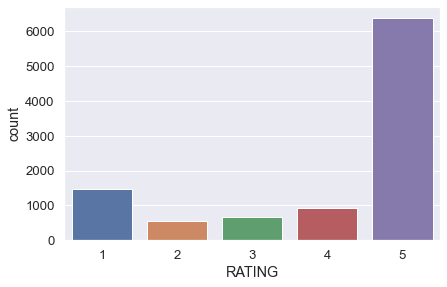

In [9]:
##  let's explore the distribution of rating variable
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(df['RATING'])

The distribution of ratings does not seem to be unified.
We can see that the frequency of "score 5" is very high compared to the rest.

In the case of scores: 1, 3 and 5, we can conclude that the customer was disappointed, neutral and satisfied.
Scores 4 and 2 falls into a "gray area". (Can be determined by business needs).

In our case, due to the unbalanced representation, we will decide to label the scores as follows:
Score 5 as positive with the label - 3
Scores 2, 3, 4 as neutral with the label - 2
Score 1 as negative with the label - 1

In [59]:
##   1: 'negative' --  2: 'neutral', 3: 'neutral', 4: 'neutral' --- 5: 'positive'
df['y'] = df['RATING'].map( {1: 1, 2: 2, 3: 2, 4: 2, 5: 3}).astype(int)
df[['y','RATING']]

,y,RATING
0,2,4
1,3,5
2,3,5
3,3,5
4,3,5
...,...,...
9995,2,2
9996,3,5
9997,2,4
9998,3,5


# Section 2: Exploratory Data Analysis
In this section, we will perform several basic analyses in order to gain a better understanding of the data set

DATE feature: By utilizing the Date variable, we can generate business insights and interesting patterns

In [13]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day

In [14]:
print("year",sorted(set(df['year'].unique())))
print("month",sorted(set(df['month'].unique())))
print("day",sorted(set(df['day'].unique())))

year [2019, 2020, 2021]
month [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
day [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [15]:
#Function for checking word length
def cal_len(data):
    return len(data)

#Create generic plotter with Seaborn
def plot_count_dis(count_ones,count_zeros,count_treg,title_1,title_2,title_3,subtitle):
    fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
    sns.set_style("darkgrid")
    sns.distplot(count_zeros,ax=ax1,color='Blue')
    ax1.set_title(title_1)
    sns.distplot(count_ones,ax=ax2,color='Red')
    ax2.set_title(title_2)
    sns.distplot(count_treg,ax=ax3,color='yellow')
    #sns.histplot(count_treg,bins = 100)
    ax3.set_title(title_3)
    fig.suptitle(subtitle)
    plt.show()

def plot_count_bar(count_ones,count_zeros,count_treg,title_1,title_2,title_3,subtitle):
    fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
    sns.set_style("darkgrid")
    sns.countplot(count_ones,ax=ax1)
    ax1.set_title(title_1)
    sns.countplot(count_zeros,ax=ax2)
    ax2.set_title(title_2)
    sns.countplot(count_treg,ax=ax3)
    #sns.histplot(count_treg,bins = 100)
    ax3.set_title(title_3)
    fig.suptitle(subtitle)
    plt.show()

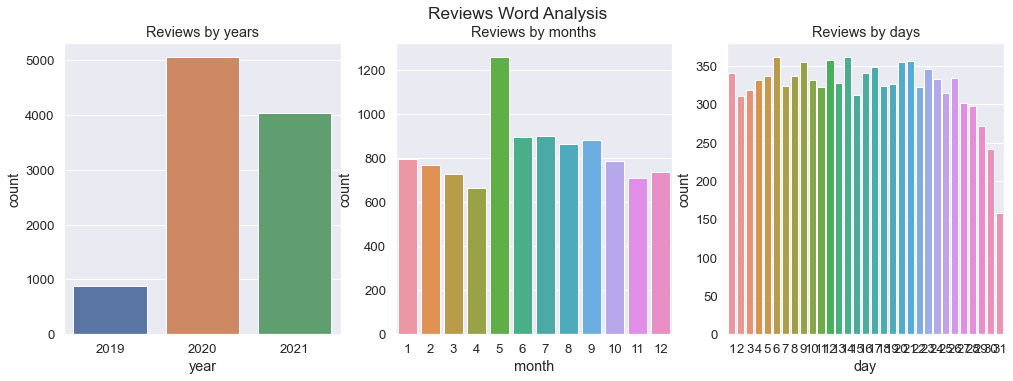

In [16]:
plot_count_bar(df['year'],df['month'],df['day'],"Reviews by years","Reviews by months","Reviews by days","Reviews Word Analysis")

As we can see, most of the responses were made in the years 2020 and 2021
We can also notice that responses in both months and days are distributed evenly (except for month 5).
Future research can include a semantic classification by period, events, dates and etc.

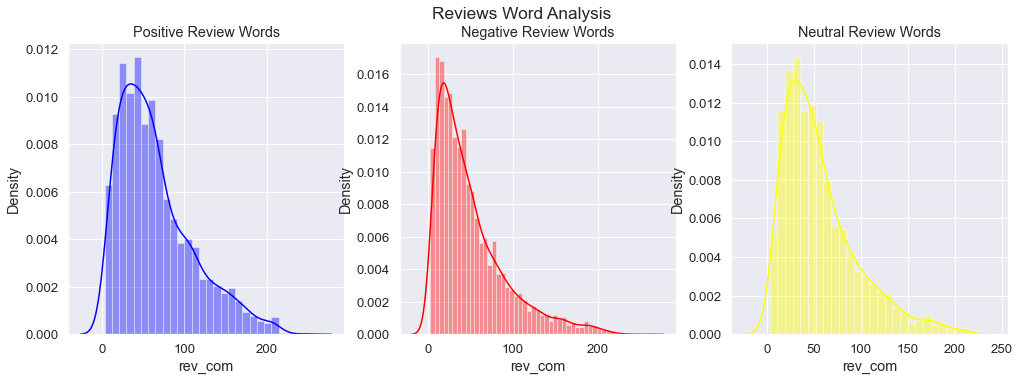

In [17]:
### Let's examine the distribution of words according to Review type
count_good=df[df['y']== 3]
count_bad=df[df['y']== 2]
count_nat=df[df['y']== 1]

count_good_words=count_good['rev_com'].str.split().apply(lambda z:cal_len(z))
count_bad_words=count_bad['rev_com'].str.split().apply(lambda z:cal_len(z))
count_nat_words=count_nat['rev_com'].str.split().apply(lambda z:cal_len(z))

plot_count_dis(count_good_words,count_bad_words,count_nat_words,"Positive Review Words","Negative Review Words","Neutral Review Words","Reviews Word Analysis")

We can see that the distributions are relatively similar - (a one-sided distribution with a positive skew)
Therefore, we cannot necessarily conclude that there is a disciplinary pattern according to the distribution of words

*Additional statistical methods may be needed to determine a pattern

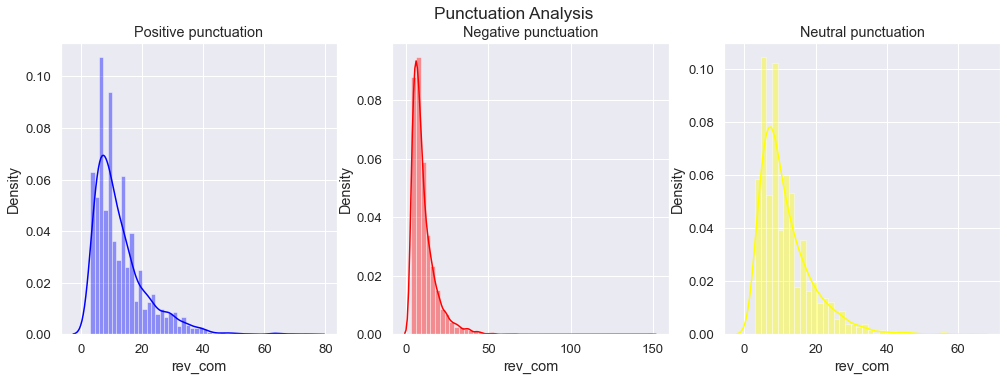

In [18]:
### Let's examine the distribution of punctuations according to Review type

count_good_punctuations=count_good['rev_com'].apply(lambda z: len([c for c in str(z) if c in string.punctuation]))
count_bad_punctuations=count_bad['rev_com'].apply(lambda z:len([c for c in str(z) if c in string.punctuation]))
count_nat_punctuations=count_nat['rev_com'].apply(lambda z:len([c for c in str(z) if c in string.punctuation]))
plot_count_dis(count_good_punctuations,count_bad_punctuations,count_nat_punctuations,"Positive punctuation","Negative punctuation","Neutral punctuation","Punctuation Analysis")

Similar results can be found for punctuation distribution

### Y labeling - Imbalanced Data


<AxesSubplot:xlabel='y', ylabel='count'>

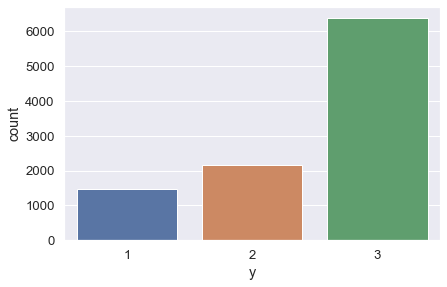

In [19]:
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(df['y'])

We have seen before that the data is imbalanced.
As a consequence, we will have bias and may fail to make accurate classifications.

In the case of imbalanced data. Due to the prior frequency of the classes, a classifier model can predict most of the observations as the majority class.
Consequently, our model can achieve "high" accuracy, but in actuality, we will have inferior results when predicting minority classes.
(These issues are evident in the recall and precision indices - Tried and tested)






In order to act, we must balance the data.
In our case, we will perform under-sampling by a fixed number of observations like the minority class has.


For under-sampling, we can use several methods, such as:
Sample from the longest in the majority class (in order to keep as much information as we can).
Yet, due to the number of words distribution (a sharp curve with a low variance) - A random sample can be taken.


In [20]:
df['DATE'] = df['DATE'].dt.strftime('%Y-%m-%d')
yy = df['y']
xx = df.loc[:, df.columns != 'y']
# set up the random undersampling class
rus = RandomUnderSampler(
    sampling_strategy='auto', # samples only the majority class
    random_state=0, # for reproducibility
    replacement=True # if it should resample with replacement
)
resampled, y_resampled = rus.fit_resample(xx, yy)
resampled['y'] = y_resampled
resampled['y'].value_counts()

3    1466
2    1466
1    1466
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

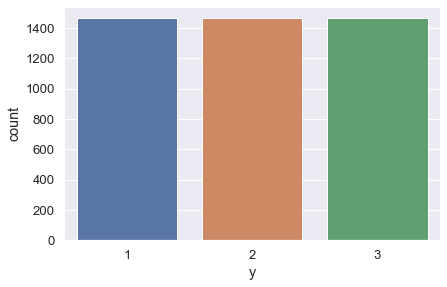

In [21]:
sns.set(style = "darkgrid" , font_scale = 1.2)
sns.countplot(resampled['y'])

## Section 3: Text preprocessing

In our set, for each review, there are three paragraphs of text.
RATING, DESCRIPTION1, DESCRIPTION2.


As part of our study, we will examine the text paragraphs and their contribution to the semantic classification both together and separately.

As part of this section, we will create our corpus manually - and then we will create our data set in frequency form.

We will perform these processes simultaneously:
- For RATING as a dataset
- For DESCRIPTION1 as a dataset
- For DESCRIPTION2 as a dataset
- For a combination of all three together

We will try to understand the best and most significant set, and then we will examine different representations and methods for semantic classification.

To build our own corps, we will sort the data according to types of reviews and then perform the process for each type of review

In [22]:
# splitting the dataset by reviews
df_good = resampled[resampled['y']==3]
df_bad = resampled[resampled['y']==1]
df_nat = resampled[resampled['y']==2]
df_good.sample(4)

,DATE,RATING,REVIEW_TITLE,DESCRIPTION1,DESCRIPTION2,LINK,rev_com,year,month,day,y
4236,2020-08-05,5,Great first juice cleanse experience,"This is my first juice cleanse, I opted to try...","The juices were really good, I was not hungry ...",https://www.amazon.com/gp/customer-reviews/R14...,Great first juice cleanse experience. This is ...,2020,8,5,3
4031,2019-12-15,5,Flavorful option for mouth quench,Good for one watching sugar levels.,Good for one watching sugar levels.,https://www.amazon.com/gp/customer-reviews/R3D...,Flavorful option for mouth quench. Good for on...,2019,12,15,3
3054,2020-08-20,5,Good Flavor,Good product!!!,Good Flavor.,https://www.amazon.com/gp/customer-reviews/R9U...,Good Flavor. Good product!!!. Good Flavor.,2020,8,20,3
3606,2019-12-15,5,Yum,"It's good, could always be darker though.","It's good, could always be darker though.",https://www.amazon.com/gp/customer-reviews/R12...,"Yum. It's good, could always be darker though....",2019,12,15,3


In [23]:
###  Create sets for Xs based on the type of review

## REVIEW_TITLE
df_good_x_title = df_good['REVIEW_TITLE']
df_bad_x_title = df_bad['REVIEW_TITLE']
df_nat_x_title = df_nat['REVIEW_TITLE']

## DESCRIPTION1
df_good_x_D1 = df_good['DESCRIPTION1']
df_bad_x_D1 = df_bad['DESCRIPTION1']
df_nat_x_D1 = df_nat['DESCRIPTION1']

## DESCRIPTION2
df_good_x_D2 = df_good['DESCRIPTION2']
df_bad_x_D2 = df_bad['DESCRIPTION2']
df_nat_x_D2 = df_nat['DESCRIPTION2']

## REVIEW_TITLE + DESCRIPTION2 + DESCRIPTION1
df_good_x_com = df_good['rev_com']
df_bad_x_com = df_bad['rev_com']
df_nat_x_com = df_nat['rev_com']


In [24]:
### text cleaning and tokenizing functions

def token_fun(tokens):
    #tokens = tokens.split()
    tokens= tokens.lower()
    tokens = nltk.tokenize.word_tokenize(tokens)
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if len(t) > 3]
    tokens= [t for t in tokens if t.isalnum()]
    return tokens

def token_fun2(tokens):
    soup = BeautifulSoup(tokens, "html.parser") #remove html tags
    tokens = soup.get_text()
    tokens = re.sub('\[[^]]*\]', ' ', tokens)
    tokens = re.sub(r'http\S+', '', tokens) #remove urls
    emoji_pattern = re.compile("[(\U0001F600-\U0001F92F|\U0001F300-\U0001F5FF|\U0001F680-\U0001F6FF|\U0001F190-\U0001F1FF|\U00002702-\U000027B0|\U0001F926-\U0001FA9F|\u200d|\u2640-\u2642|\u2600-\u2B55|\u23cf|\u23e9|\u231a|\ufe0f)]+", flags=re.UNICODE)
    tokens = re.sub(emoji_pattern, '', tokens)
    tokens= tokens.lower()
    tokens = nltk.tokenize.word_tokenize(tokens)
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if len(t) > 3]
    tokens= [t for t in tokens if t.isalnum()]
    return tokens

In [25]:
## creating our on corpus from different reviews lists (our vocabulary)
# for each review -> sanding the text to the cleaning and tokenizing functions, crate lists with positive, negative, neutral words and united corpus

def bigbig(df_good_x,df_bad_x,df_nat_x):
    vocab = {}
    positive_list = []
    negative_list = []
    neutral_list = []
    i = 0
    for rev in df_good_x:
        tokens = token_fun(rev)
        if len(tokens) == 0:
            continue
        positive_list.append(tokens)
        for token in tokens:
            if token not in vocab:
                vocab[token] = i
                i += 1
    i = 0
    for rev in df_bad_x:
        tokens = token_fun(rev)
        if len(tokens) == 0:
            continue
        negative_list.append(tokens)
        for token in tokens:
            #print(token)
            if token not in vocab:
                vocab[token] = i
                i += 1
    i = 0
    for rev in df_nat_x:
        tokens = token_fun(rev)
        if len(tokens) == 0:
            continue
        neutral_list.append(tokens)
        for token in tokens:
            #print(token)
            if token not in vocab:
                vocab[token] = i
                i += 1

    print(len(vocab))
    return vocab, positive_list, negative_list, neutral_list

In [26]:
## REVIEW_TITLE (corpus, positive_list, negative_list, neutral_list words)
vocab_title, positive_list_title, negative_list_title, neutral_list_title = bigbig(df_good_x_title,df_bad_x_title,df_nat_x_title)

## DESCRIPTION1 (corpus, positive_list, negative_list, neutral_list words)
vocab_df_good_x_D1, positive_list_D1, negative_list_D1, neutral_list_D1 = bigbig(df_good_x_D1,df_bad_x_D1,df_nat_x_D1)

## DESCRIPTION2 (corpus, positive_list, negative_list, neutral_list words)
vocab_df_D2, positive_list_D2, negative_list_D2, neutral_list_D2 = bigbig(df_good_x_D2,df_bad_x_D2,df_nat_x_D2)

## REVIEW_TITLE + DESCRIPTION2 + DESCRIPTION1 (corpus, positive_list, negative_list, neutral_list words)
vocab_com, positive_list_com, negative_list_com, neutral_list_com = bigbig(df_good_x_com,df_bad_x_com,df_nat_x_com)

2317
7643
3289
7968


In [27]:
## Count words in our corpus (count function and frequency function) and return the number of words/frequency, as well as the label for each

def tok_to_vec_sum(tokens, lable,vocab):
    mat = np.zeros(len(vocab)+1)
    for t in tokens:
        i = vocab[t]
        mat[i] += 1
    mat[-1] = lable
    return mat

def tok_to_vec_freq(tokens, lable,vocab):
    mat = np.zeros(len(vocab)+1)
    for t in tokens:
        i = vocab[t]
        mat[i] += 1
    mat = mat / mat.sum()
    mat[-1] = lable
    return mat

In [28]:
## crate_dataset function - by frequency representation for each word in our data

def crate_dataset(positive_list,neutral_list,negative_list,vocab):

    uni = len(positive_list)+len(neutral_list)+len(negative_list)
    uni_data = np.zeros((uni,len(vocab)+1))
    print(uni_data.shape)
    i = 0

    for tokens in positive_list:
        #fetures_leable = tok_to_vec_sum(tokens,1)
        fetures_leable = tok_to_vec_freq(tokens, 3,vocab)
        uni_data[i, :] = fetures_leable
        i += 1

    for tokens in neutral_list:
        #fetures_leable = tok_to_vec_sum(tokens,1)
        fetures_leable = tok_to_vec_freq(tokens, 2,vocab)
        uni_data[i, :] = fetures_leable
        i += 1

    for tokens in negative_list:
        #fetures_leable = tok_to_vec_sum(tokens,1)
        fetures_leable = tok_to_vec_freq(tokens, 1,vocab)
        uni_data[i, :] = fetures_leable
        i += 1


    return uni_data

In [29]:
# REVIEW_TITLE data sets representend by frequancy marix of weach word
uni_data_title = crate_dataset(positive_list_title, negative_list_title, neutral_list_title,vocab_title)

# DESCRIPTION1 data sets representend by frequancy marix of weach word
uni_data_D1 = crate_dataset(positive_list_D1, negative_list_D1, neutral_list_D1,vocab_df_good_x_D1)

# DESCRIPTION2 data sets representend by frequancy marix of weach word
uni_data_D2 = crate_dataset(positive_list_D2, negative_list_D2, neutral_list_D2,vocab_df_D2)

# REVIEW_TITLE data sets representend by frequancy marix of weach word
uni_data_com = crate_dataset(positive_list_com, negative_list_com, neutral_list_D2,vocab_com)

(4196, 2318)
(4378, 7644)
(4279, 3290)
(4358, 7969)


In [30]:
### shuffle the data sets by rows
uni_data_title = shuffle(uni_data_title)
uni_data_D1 = shuffle(uni_data_D1)
uni_data_D2 = shuffle(uni_data_D2)
uni_data_com = shuffle(uni_data_com)

## Section 4: modeling and evaluation
We will perform training using 3 models that fit the classification of several classes -
- Naive Bayes
- Logistic Regression
- Bernoulli Naive Bayes

We will perform classification on each of the subsets, selecting the data set and significant model that provide the best classification results (by accuracy, precision and recall)

In [35]:
list_datasets = [uni_data_title,uni_data_D1,uni_data_D2,uni_data_com]
prediction = pd.DataFrame()
pred_x_NB = []
pred_x_RL = []
pred_x_Ber = []

y_testlits = []
for datalist in list_datasets:
    X_train, X_test, y_train, y_test = train_test_split(datalist[:, :-1], datalist[:,-1], test_size=0.2, random_state=42)
    model_NB = MultinomialNB().fit(X_train, y_train)
    logreg = linear_model.LogisticRegression(C=1e5).fit(X_train, y_train)
    Ber_model = BernoulliNB().fit(X_train, y_train)
    y_testlits.append(y_test)
    pred_x_NB.append(model_NB.predict(X_test))
    pred_x_RL.append(logreg.predict(X_test))
    pred_x_Ber.append(Ber_model.predict(X_test))

In [36]:
for i in range(0,len(list_datasets)):
    print("Dataset number", i ,":",metrics.classification_report(y_testlits[i], pred_x_NB[i], target_names = ["negative", "neutral",'positive']))

Dataset number 0 :               precision    recall  f1-score   support

    negative       0.48      0.45      0.46       286
     neutral       0.52      0.51      0.51       272
    positive       0.55      0.59      0.57       282

    accuracy                           0.52       840
   macro avg       0.51      0.52      0.51       840
weighted avg       0.51      0.52      0.51       840

Dataset number 1 :               precision    recall  f1-score   support

    negative       0.57      0.55      0.56       295
     neutral       0.72      0.66      0.69       295
    positive       0.65      0.72      0.69       286

    accuracy                           0.65       876
   macro avg       0.65      0.65      0.65       876
weighted avg       0.65      0.65      0.65       876

Dataset number 2 :               precision    recall  f1-score   support

    negative       0.47      0.39      0.43       316
     neutral       0.51      0.51      0.51       279
    positive      

In [37]:
for i in range(0,len(list_datasets)):
    print("Dataset number", i ,":",metrics.classification_report(y_testlits[i], pred_x_RL[i], target_names = ["negative", "neutral",'positive']))

Dataset number 0 :               precision    recall  f1-score   support

    negative       0.46      0.43      0.45       286
     neutral       0.45      0.44      0.44       272
    positive       0.51      0.55      0.53       282

    accuracy                           0.48       840
   macro avg       0.47      0.48      0.47       840
weighted avg       0.47      0.48      0.48       840

Dataset number 1 :               precision    recall  f1-score   support

    negative       0.57      0.61      0.59       295
     neutral       0.68      0.64      0.66       295
    positive       0.67      0.66      0.67       286

    accuracy                           0.64       876
   macro avg       0.64      0.64      0.64       876
weighted avg       0.64      0.64      0.64       876

Dataset number 2 :               precision    recall  f1-score   support

    negative       0.51      0.46      0.49       316
     neutral       0.47      0.44      0.46       279
    positive      

In [38]:
for i in range(0,len(list_datasets)):
    print("Dataset number", i ,":",metrics.classification_report(y_testlits[i], pred_x_Ber[i], target_names = ["negative", "neutral",'positive']))

Dataset number 0 :               precision    recall  f1-score   support

    negative       0.46      0.44      0.45       286
     neutral       0.48      0.48      0.48       272
    positive       0.52      0.55      0.53       282

    accuracy                           0.49       840
   macro avg       0.49      0.49      0.49       840
weighted avg       0.49      0.49      0.49       840

Dataset number 1 :               precision    recall  f1-score   support

    negative       0.54      0.44      0.49       295
     neutral       0.67      0.65      0.66       295
    positive       0.59      0.71      0.65       286

    accuracy                           0.60       876
   macro avg       0.60      0.60      0.60       876
weighted avg       0.60      0.60      0.60       876

Dataset number 2 :               precision    recall  f1-score   support

    negative       0.48      0.38      0.42       316
     neutral       0.50      0.48      0.49       279
    positive      

Initial findings -
- We can see that the united data set produced the best results across all models.
- Based on the analysis of the models, we can conclude that the effects of DESCRIPTION1 were most significant.
- We can see that the best results are obtained when we use the logistic regression classification model.

In [40]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

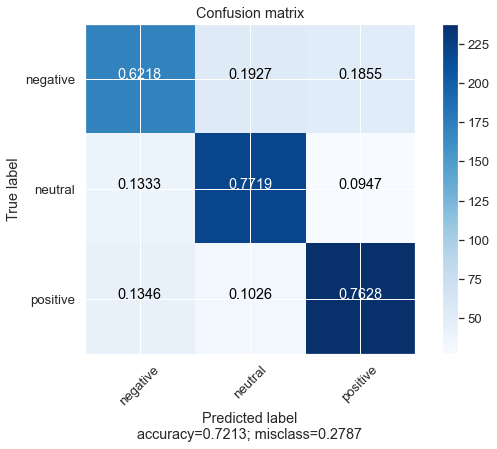

In [41]:
labels = ["negative", "neutral",'positive']
#for i in range(0,4):
cm = confusion_matrix(y_testlits[3], pred_x_RL[3])
plot_confusion_matrix(cm,labels)
#    plot_confusion_matrix(cm,labels,normalize=False)

The confusion matrix shows us that:
The accuracy percentage is 76% for classifying reviews as positive
The accuracy percentage is 77% for classifying reviews as neutral
The accuracy percentage is 62% for classifying reviews as negative
In total the average accuracy index is 72%

## Section 5:  Text representation methods

Throughout this section, we will explore different methods of representing the dataset.
This will allow us to determine the method of representation that provides the best results.

- Bag of words
- Tf - IDF
- N-gram (N = 3)


In [42]:
# the united dataset
resampled_test = resampled[['rev_com','y']]
resampled_test = shuffle(resampled_test)
resampled_test

,rev_com,y
1637,"It's a'ight, had better.. Not what I was expec...",2
3585,Healthy snack pack for great price. Another gi...,3
243,These pods did not work in my Keurig. The few ...,1
3333,Brought my lip color back. Very effective for ...,3
2522,"Great juice, terrible packaging.. My husband r...",2
...,...,...
1386,"Sweet and disgusting. The """"New Improved Formu...",1
121,They let this sit in high heat. It curdles whe...,1
2790,アレンジがきく. 美味しいです。. 甘いですが、青汁粉末を入れてちょうどいいで...,2
2033,I use my folgers and add some dark roast to it...,2


In [43]:
resampled_test.y.value_counts()

3    1466
2    1466
1    1466
Name: y, dtype: int64

In [44]:
### text cleaning and tokenizing functions

def token_fun3(tokens):
    #tokens = tokens.split()
    tokens= tokens.lower()
    #tokens = nltk.tokenize.word_tokenize(tokens)
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    tokens = [t for t in tokens if len(t) > 3]
    tokens= [t for t in tokens if t.isalnum()]
    return tokens

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text


#Stemming the text
def simple_lemmatize(text):
    text = [wordnet_lemmatizer.lemmatize(text)]
    return text


def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [45]:
###  cleaning and tokenizing the text
resampled_test['rev_com'] = resampled_test['rev_com'].apply(strip_html)
resampled_test['rev_com'] = resampled_test['rev_com'].apply(remove_special_characters)
resampled_test['rev_com'] = resampled_test['rev_com'].apply(denoise_text)
resampled_test['rev_com']=resampled_test['rev_com'].apply(remove_between_square_brackets)
resampled_test['rev_com']=resampled_test['rev_com'].apply(simple_lemmatize)
resampled_test['rev_com']=resampled_test['rev_com'].apply(remove_stopwords)
resampled_test.shape

(4398, 2)

In [62]:
# dataset splits
norm_train_reviews=resampled_test.rev_com[:3000]
norm_test_reviews=resampled_test.rev_com[3000:]
train_y=resampled_test.y[:3000]
test_y=resampled_test.y[3000:]
train_y = train_y.to_frame()
test_y = test_y.to_frame()
norm_test_reviews

1275    [ ' got 3 bottles paid 6 bottles got 3 got 3 b...
4141    [ ' Makes coffee taste amazing absolutely ador...
3168    [ ' Great cup coffee always enjoyed cup McDona...
2905    [ ' Basically flavor Super weak flavor Doesnt ...
4325    [ ' OMG LOVE LOVE LOVE COFFEE BEST coffee ever...
                              ...                        
1386    [ ' Sweet disgusting New Improved Formula impr...
121     [ ' let sit high heat curdles made Ive using y...
2790                                              [ ' ' ]
2033    [ ' use folgers add dark roast itgreat coffee ...
4170    [ ' Amayzing Probably single best tasting wate...
Name: rev_com, Length: 1398, dtype: object

In [63]:
### Bag of words
# Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False)
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (3000, 4442)
BOW_cv_test: (1398, 4442)


In [64]:
### Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True)
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (3000, 4442)
Tfidf_test: (1398, 4442)


In [74]:
count_vect = CountVectorizer(ngram_range=(1,3))
Ngram_train_reviews = count_vect.fit_transform(norm_train_reviews)
Ngram_test_reviews=count_vect.transform(norm_test_reviews)
print('Ngram_train:',Ngram_train_reviews.shape)
print('Ngram_test:',Ngram_test_reviews.shape)

Ngram_train: (3000, 132054)
Ngram_test: (1398, 132054)


In [67]:
## Modeling for tf idf - using TfidfVectorizer
model_NB_model = MultinomialNB().fit(tv_train_reviews, train_y)
logreg = linear_model.LogisticRegression(C=1e5).fit(tv_train_reviews, train_y)
Ber_model = BernoulliNB().fit(tv_train_reviews, train_y)

pred_x_NBqqq = model_NB_model.predict(tv_test_reviews)
pred_x_RLqqq = logreg.predict(tv_test_reviews)
pred_x_Berqqq = Ber_model.predict(tv_test_reviews)

In [68]:
print("Dataset NB:",metrics.classification_report(test_y, pred_x_NBqqq, target_names = ["negative", "neutral",'positive']))
print("Dataset RL:",metrics.classification_report(test_y, pred_x_RLqqq, target_names = ["negative", "neutral",'positive']))
print("Dataset BerL:",metrics.classification_report(test_y, pred_x_Berqqq, target_names = ["negative", "neutral",'positive']))

Dataset NB:               precision    recall  f1-score   support

    negative       0.34      0.73      0.47       448
     neutral       0.60      0.31      0.41       477
    positive       0.53      0.21      0.30       473

    accuracy                           0.41      1398
   macro avg       0.49      0.42      0.39      1398
weighted avg       0.49      0.41      0.39      1398

Dataset RL:               precision    recall  f1-score   support

    negative       0.49      0.22      0.31       448
     neutral       0.40      0.84      0.54       477
    positive       0.53      0.21      0.30       473

    accuracy                           0.43      1398
   macro avg       0.47      0.43      0.38      1398
weighted avg       0.47      0.43      0.39      1398

Dataset BerL:               precision    recall  f1-score   support

    negative       0.49      0.18      0.26       448
     neutral       0.39      0.86      0.54       477
    positive       0.52      0.21    

In [69]:
## Modeling for bag of words
model_NB_model = MultinomialNB().fit(cv_train_reviews, train_y)
logreg = linear_model.LogisticRegression(C=1e5).fit(cv_train_reviews, train_y)
Ber_model = BernoulliNB().fit(cv_train_reviews, train_y)

pred_x_NBqqq_c = model_NB_model.predict(cv_test_reviews)
pred_x_RLqqq_c = logreg.predict(cv_test_reviews)
pred_x_Berqqq_c = Ber_model.predict(cv_test_reviews)

In [70]:
print("Dataset NB:",metrics.classification_report(test_y, pred_x_NBqqq_c, target_names = ["negative", "neutral",'positive']))
print("Dataset RL:",metrics.classification_report(test_y, pred_x_RLqqq_c, target_names = ["negative", "neutral",'positive']))
print("Dataset BerL:",metrics.classification_report(test_y, pred_x_Berqqq_c, target_names = ["negative", "neutral",'positive']))

Dataset NB:               precision    recall  f1-score   support

    negative       0.34      0.72      0.46       448
     neutral       0.59      0.32      0.41       477
    positive       0.52      0.21      0.30       473

    accuracy                           0.41      1398
   macro avg       0.48      0.42      0.39      1398
weighted avg       0.48      0.41      0.39      1398

Dataset RL:               precision    recall  f1-score   support

    negative       0.49      0.22      0.30       448
     neutral       0.40      0.84      0.54       477
    positive       0.53      0.22      0.31       473

    accuracy                           0.43      1398
   macro avg       0.47      0.43      0.39      1398
weighted avg       0.47      0.43      0.39      1398

Dataset BerL:               precision    recall  f1-score   support

    negative       0.49      0.18      0.26       448
     neutral       0.39      0.86      0.54       477
    positive       0.52      0.21    

In [75]:
## modeling for  N-gram
model_NB_model = MultinomialNB().fit(Ngram_train_reviews, train_y)
logreg = linear_model.LogisticRegression(C=1e5).fit(Ngram_train_reviews, train_y)
Ber_model = BernoulliNB().fit(Ngram_train_reviews, train_y)

pred_x_NBqqq_bi = model_NB_model.predict(Ngram_test_reviews)
pred_x_RLqqq_bi = logreg.predict(Ngram_test_reviews)
pred_x_Berqqq_bi = Ber_model.predict(Ngram_test_reviews)

In [76]:
print("Dataset NB:",metrics.classification_report(test_y, pred_x_NBqqq_bi, target_names = ["negative", "neutral",'positive']))
print("Dataset RL:",metrics.classification_report(test_y, pred_x_RLqqq_bi, target_names = ["negative", "neutral",'positive']))
print("Dataset BerL:",metrics.classification_report(test_y, pred_x_Berqqq_bi, target_names = ["negative", "neutral",'positive']))

Dataset NB:               precision    recall  f1-score   support

    negative       0.82      0.73      0.77       448
     neutral       0.62      0.77      0.69       477
    positive       0.84      0.73      0.78       473

    accuracy                           0.74      1398
   macro avg       0.76      0.74      0.75      1398
weighted avg       0.76      0.74      0.75      1398

Dataset RL:               precision    recall  f1-score   support

    negative       0.77      0.75      0.76       448
     neutral       0.63      0.69      0.66       477
    positive       0.81      0.76      0.79       473

    accuracy                           0.73      1398
   macro avg       0.74      0.73      0.74      1398
weighted avg       0.74      0.73      0.74      1398

Dataset BerL:               precision    recall  f1-score   support

    negative       0.71      0.90      0.79       448
     neutral       0.98      0.39      0.56       477
    positive       0.70      0.94    

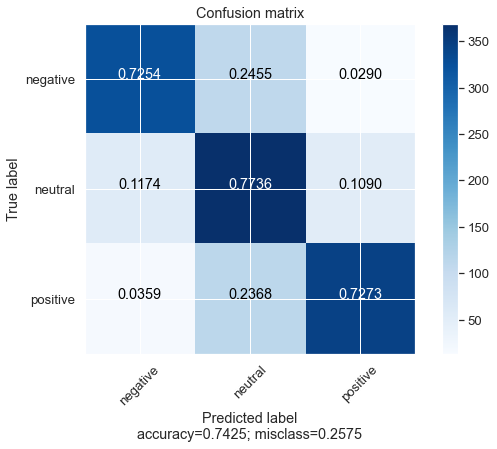

In [73]:
cm = confusion_matrix(test_y, pred_x_NBqqq_bi)
plot_confusion_matrix(cm,labels)

The confusion matrix shows us that:
The accuracy percentage is 72% for classifying reviews as positive
The accuracy percentage is 77% for classifying reviews as neutral
The accuracy percentage is 72% for classifying reviews as negative
In total, the average accuracy index is 74%

In terms of classification through Bag of words representation, we can see that the results are fairly poor. In fact, the best model is only 43% accurate.
Similar, the results for Tf - IDF representation (using the TfidfVectorizer method) are also very poor (43% accuracy).

By contrast, a representation based on N-grams (with N = 3) yields relatively good results (using the Nave Base model).
Both in terms of accuracy and minority class indexes ("recall and precision").

## Section 6 - Further discussion and explanations
Methods I have used for this task are considered to be relatively simple methods that provide good results most of the time.
However, these methods have several significant disadvantages.

By using these approaches, we break the words down and treat each individually. By doing so, we actually lose significant semantic information.
It is possible to lose the connections between words that have more complex meanings.

We can use word embeddings to preserve semantic links between words and representation of those connections.
Using word embeddings, we use neural network weights trained on many words in context.
Each word receives a vector representation that represents a position in a multidimensional space.
In this way, we preserve semantic aspects and logical meaning and identify patterns (which can't be done by simple methods).

It is the basis for many models based on networks and deep learning, which are called Language Models.
The main approaches are:
- The CNN model enables the representation of multiple words in a sequence in fixed window size.
- The RNN, LSTM, and GRU models treat texts as a time sequence and preserve information based on memory.
- A new model called ELMO Embeddings from language models - This enables contextual embedding (the embedding of the word and its context)

With these models, the meaning that is not perceived at the level of a single word can be preserved and expressed, and therefore, these methods may provide us with even better results.

Our classifier model is trained based on a corpus of words. In this corpus, we have used the context and lexical words that relate to the Amazon website (a shopping website). The style and context of shopping websites and social networks differ significantly, so I assume that our model will produce a very low accuracy rate for social networks text. I assume that there will be no representation for many words in our corpus.